# Decision Tree Classification

## Home Assignment - Liver Disease Classification

**BONUS ASSIGNMENT - 6 marks**

The dataset is classification of patients having liver disease. We will classify this data using Decision Tree.

Perform the following operations:

#### 1. Plot the following:
- Number of cases having liver disease and no disease  
- Number of cases having liver disease and no disease gender wise, two separate graphs  
- Heat map of Correlation Matrix of the entire dataset. Are there are any interconnected features looking at the matrix?  
- A pairwise scatter plot of all the features, separated by records having disease and not having diseases.

#### 2. If there is a positive or a negative correlation between any features. If there are any NaNs in the dataset, fill them up as well with a suitable method. Convert any string categories into numeric.

#### 3. Split your data manually into training and testing. Make sure you get an equal distribution of both the classes in the training dataset.

#### 4. Perform Decision Tree classification with entropy gain with a depth of 3 & 4. Plot the decision trees for all the models.

#### 5. Compare your output with the following metrics:
- Classification Report, Confusion Matrix, Decision Tree.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Number of cases having liver disease and no disease

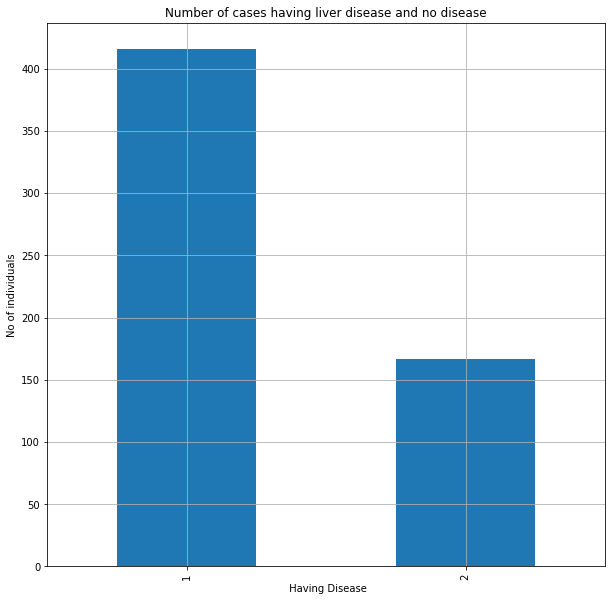

In [3]:
plt.figure(figsize=[10,10])
df['Dataset'].value_counts().plot(kind='bar')
plt.xlabel(" Having Disease")
plt.ylabel('No of individuals')
plt.title('Number of cases having liver disease and no disease')
plt.grid()

## Number of cases having liver disease and no disease gender wise, two separate graphs

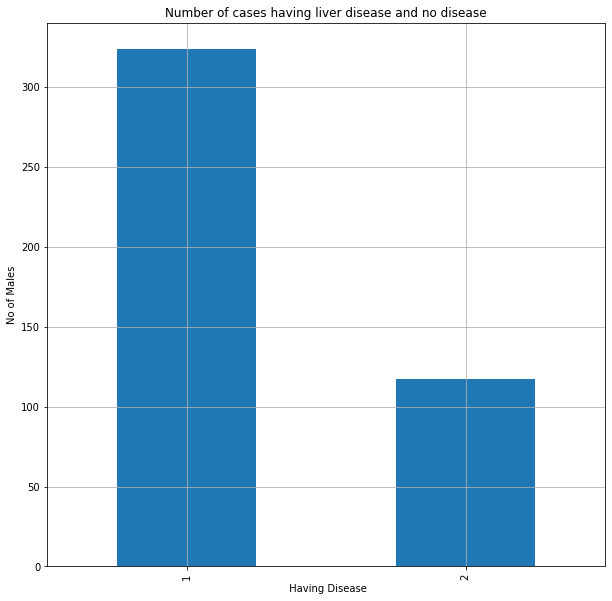

In [4]:
mfilter=(df['Gender']=='Male')
mdata=df[mfilter]
ffilter=(df['Gender']=='Female')
fdata=df[ffilter]
plt.figure(figsize=[10,10])
mdata['Dataset'].value_counts().plot(kind='bar')
plt.xlabel(" Having Disease")
plt.ylabel('No of Males')
plt.title('Number of cases having liver disease and no disease')
plt.grid()

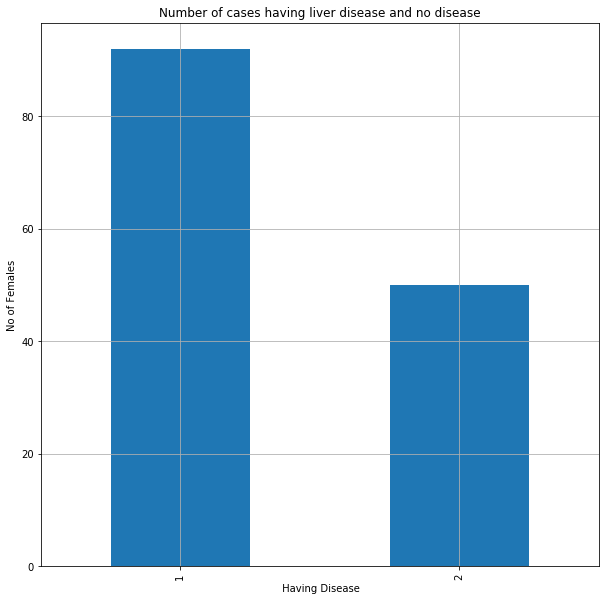

In [5]:
plt.figure(figsize=[10,10])
fdata['Dataset'].value_counts().plot(kind='bar')
plt.xlabel(" Having Disease")
plt.ylabel('No of Females')
plt.title('Number of cases having liver disease and no disease')
plt.grid()

## Heat map of Correlation Matrix of the entire dataset. Are there are any interconnected features looking at the matrix? 

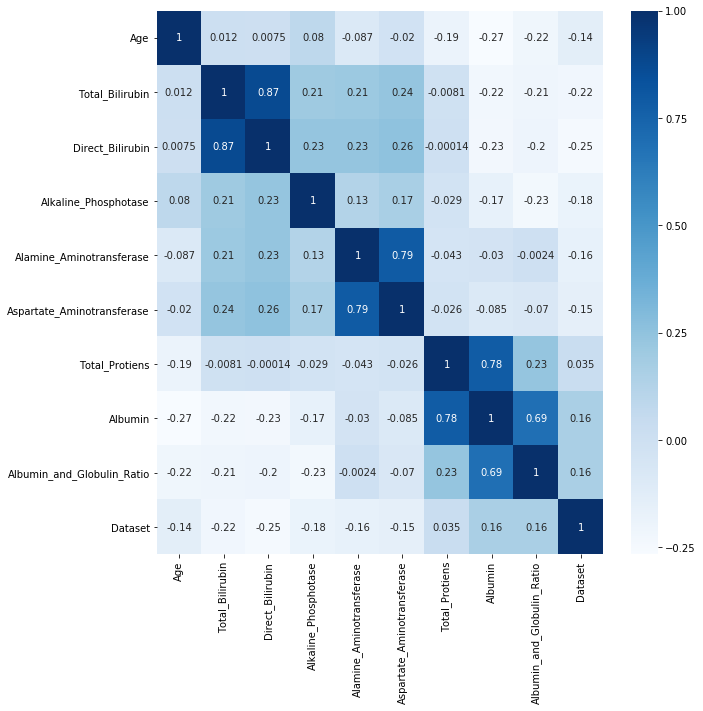

In [6]:
import seaborn
plt.figure(figsize=[10,10])
seaborn.heatmap(df.corr(),annot=True,cmap='Blues')

In [7]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### interconnected features are

- 'Total_Bilirubin', 'Direct_Bilirubin'
- 'Alamine_Aminotransferase','Aspartate_Aminotransferase'
- 'Total_Protiens', 'Albumin'
- 'Albumin','Albumin_and_Globulin_Ratio'

## A pairwise scatter plot of all the features, separated by records having disease and not having diseases.

In [8]:
pr=df[df['Dataset']==1]
nr=df[df['Dataset']==2]

2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 2
3 4
3 5
3 6
3 7
3 8
3 9
4 2
4 3
4 5
4 6
4 7
4 8
4 9


c:\users\shaikh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


5 2
5 3
5 4
5 6
5 7
5 8
5 9
6 2
6 3
6 4
6 5
6 7
6 8
6 9
7 2
7 3
7 4
7 5
7 6
7 8
7 9
8 2
8 3
8 4
8 5
8 6
8 7
8 9
9 2
9 3
9 4
9 5
9 6
9 7
9 8
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9


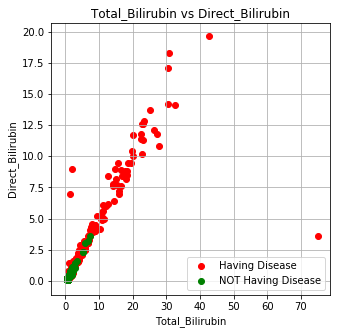

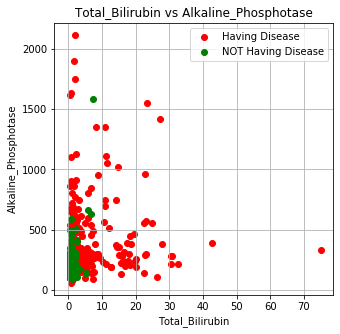

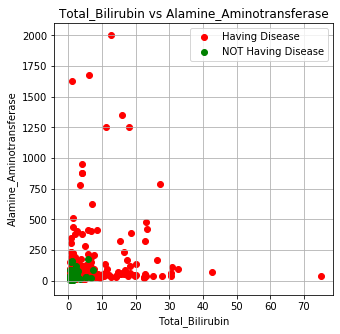

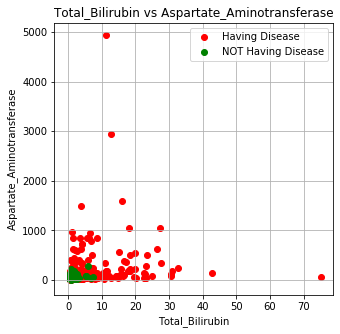

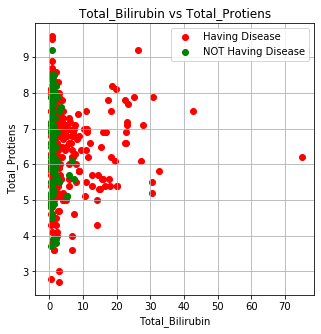

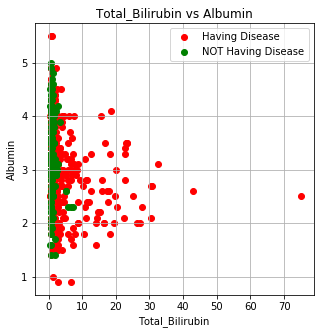

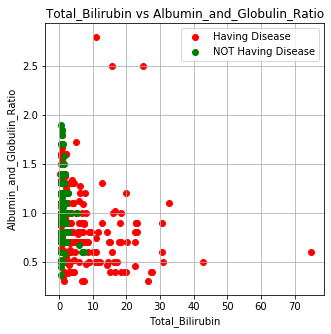

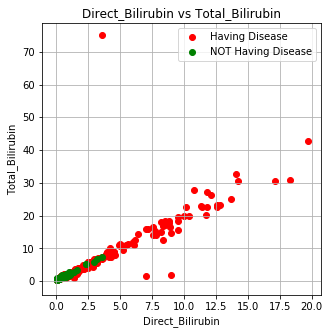

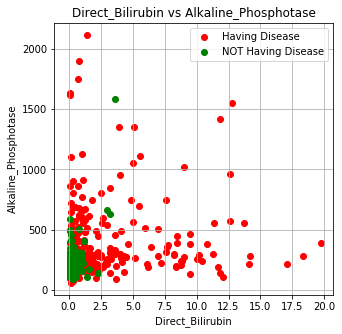

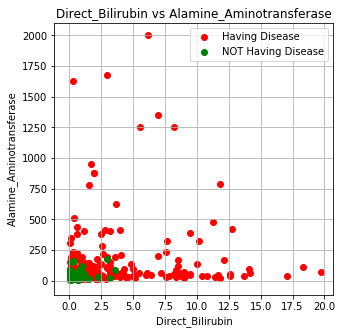

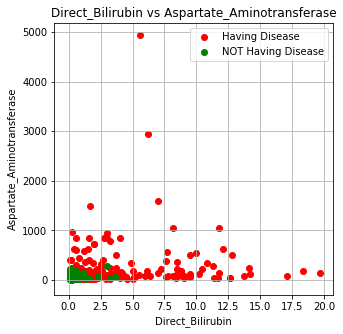

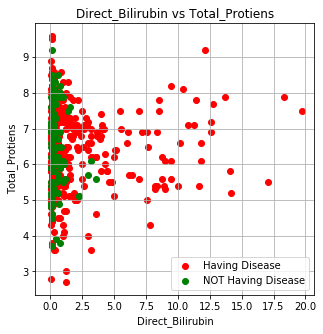

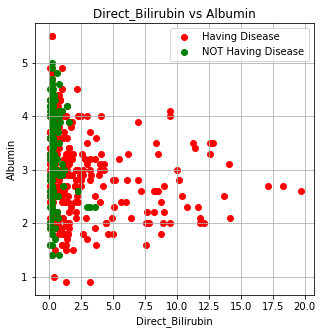

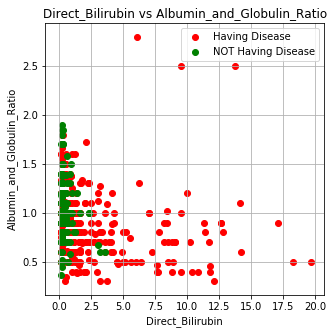

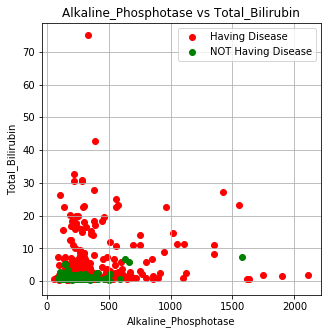

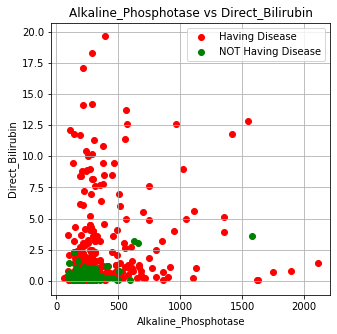

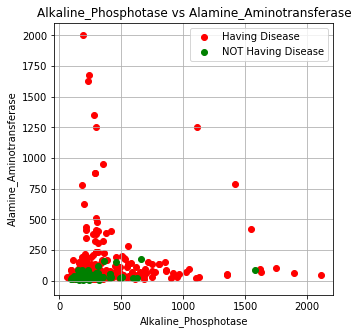

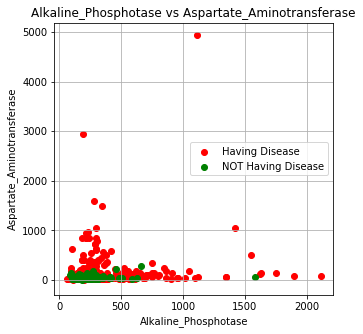

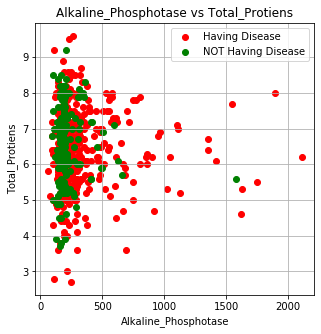

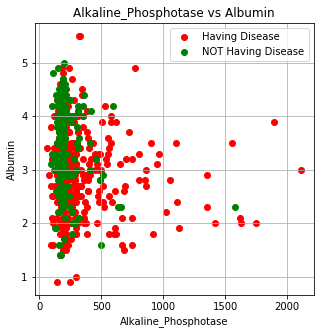

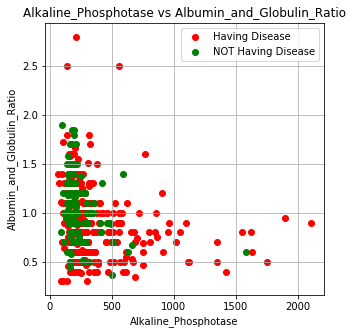

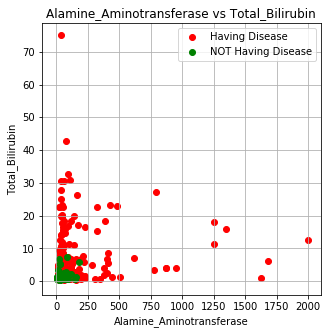

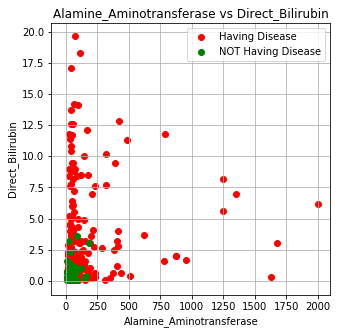

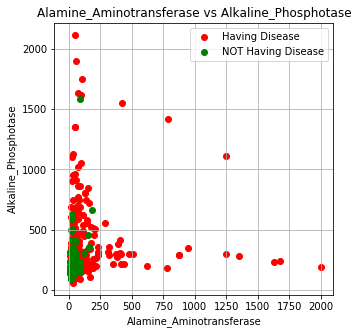

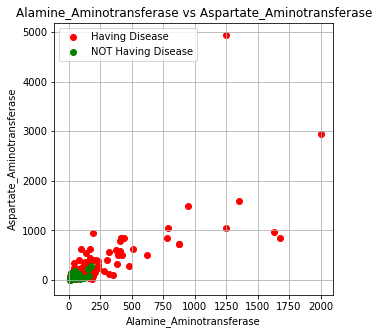

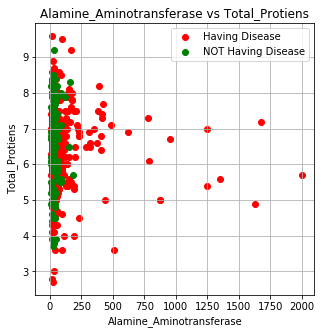

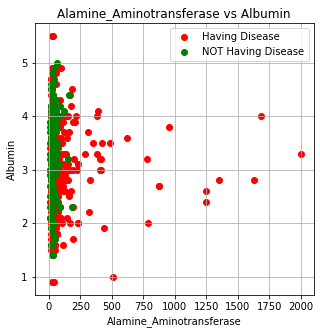

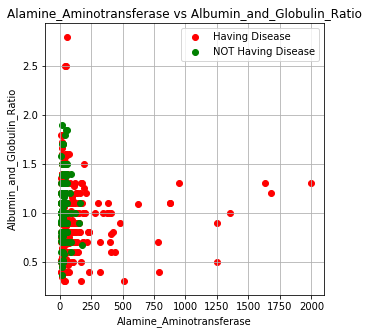

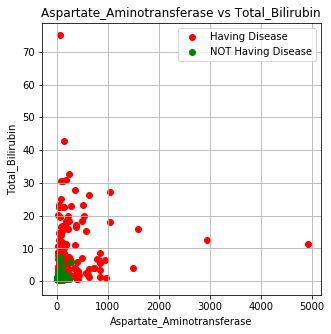

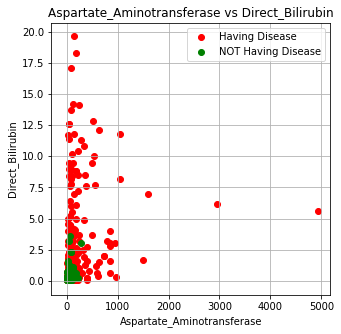

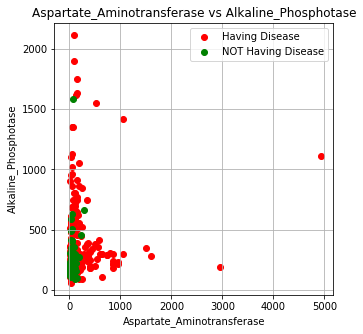

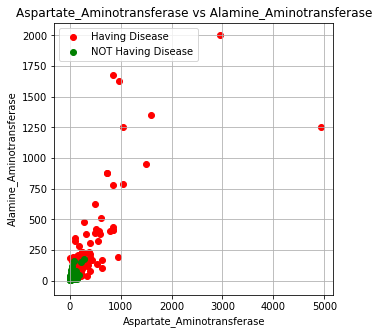

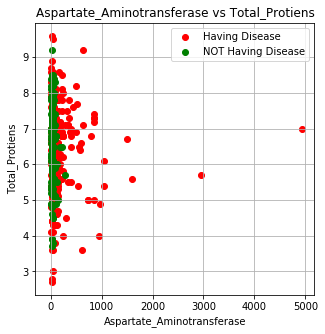

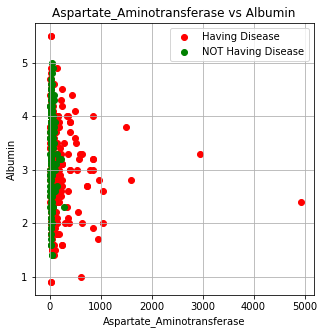

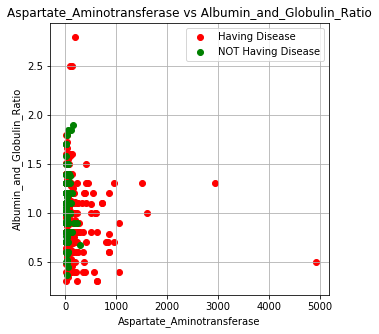

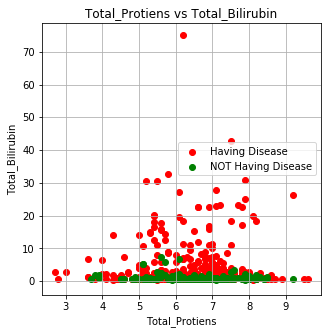

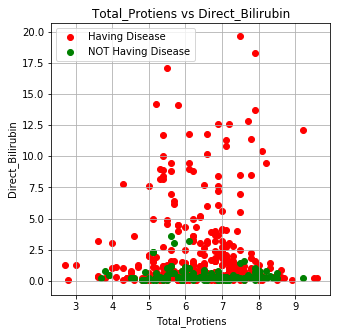

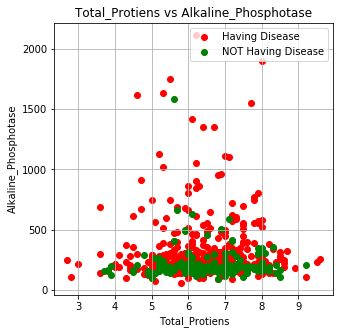

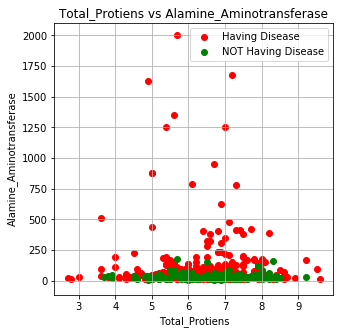

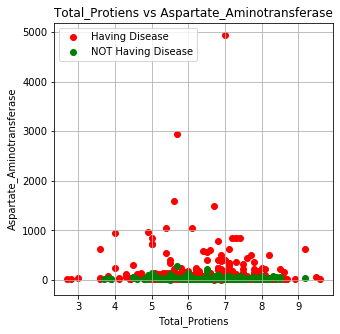

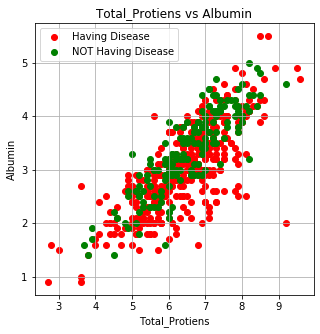

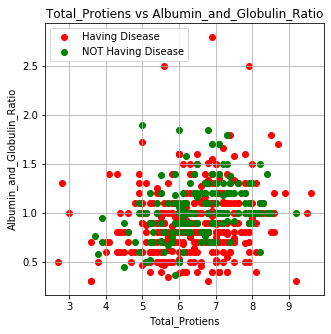

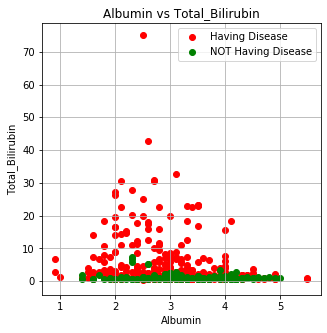

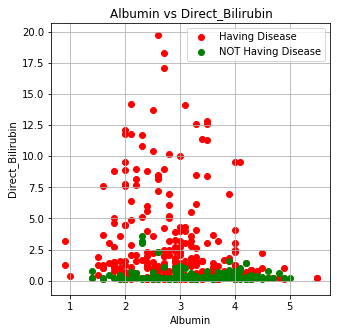

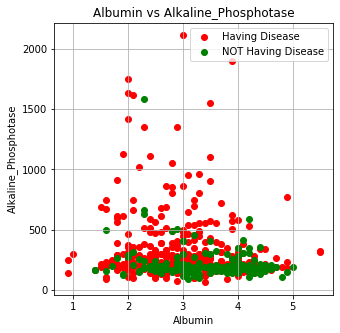

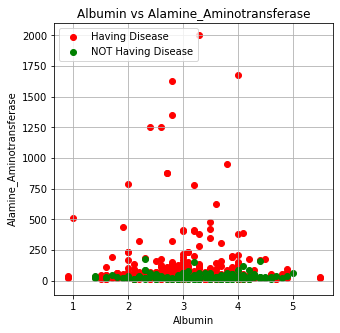

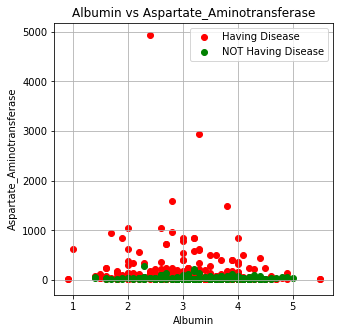

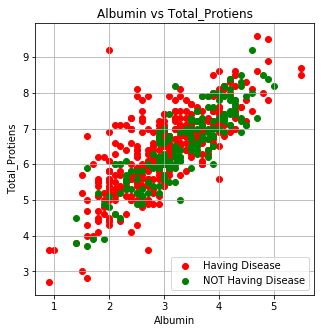

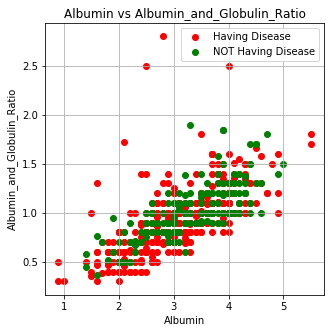

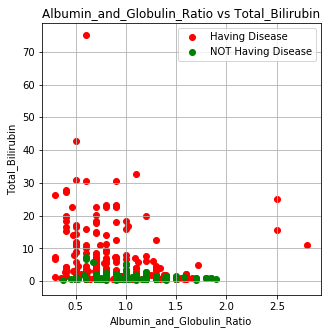

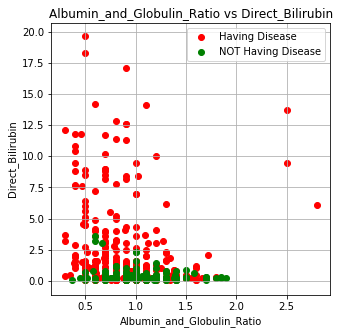

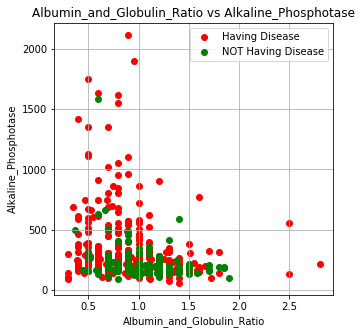

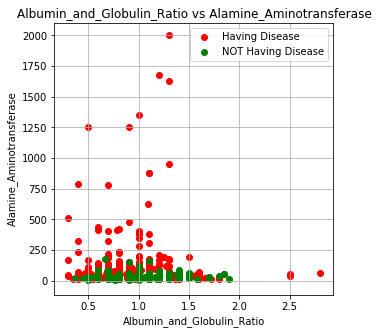

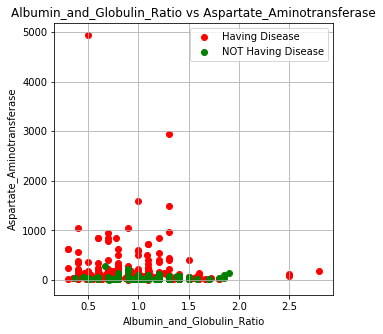

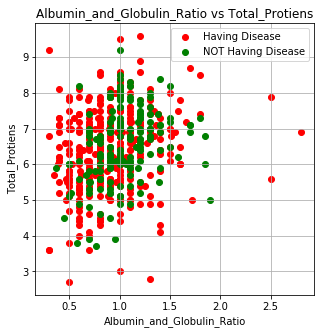

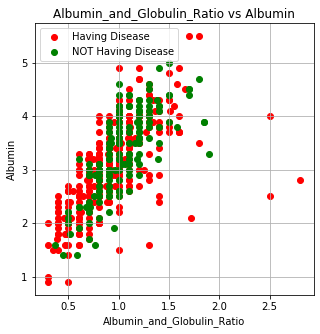

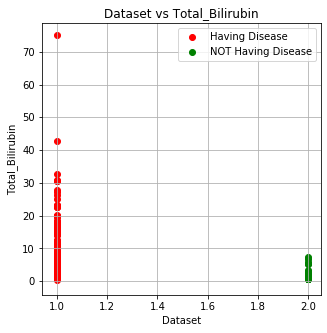

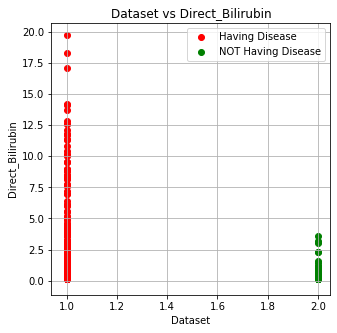

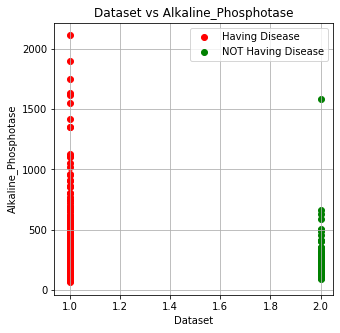

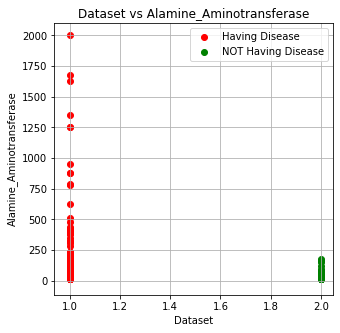

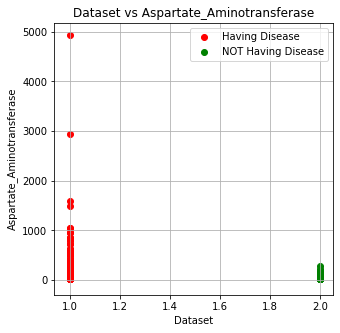

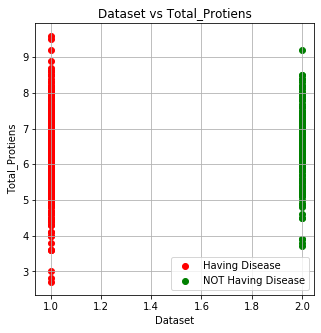

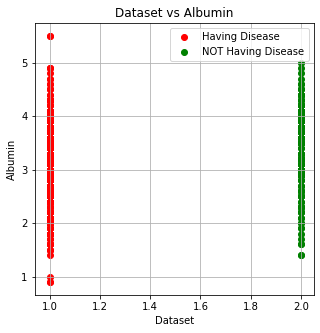

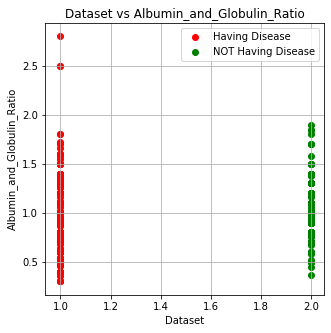

In [9]:
for i in range(2,11):
    for j in range(2,10):
        if i!=j:
            plt.figure(figsize=[5,5])
            plt.scatter(pr[df.columns[i]],pr[df.columns[j]],color='r',label='Having Disease')
            plt.scatter(nr[df.columns[i]],nr[df.columns[j]],color='g',label='NOT Having Disease')
            plt.title("{0} vs {1}".format(df.columns[i],df.columns[j]))
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])
            plt.legend()
            plt.grid()
            print(i,j)

## 2. If there is a positive or a negative correlation between any features. If there are any NaNs in the dataset, fill them up as well with a suitable method. Convert any string categories into numeric.

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
df['Age'].isnull().value_counts()

False    583
Name: Age, dtype: int64

In [12]:
df['Gender'].isnull().value_counts()

False    583
Name: Gender, dtype: int64

In [13]:
df['Total_Bilirubin'].isnull().value_counts()

False    583
Name: Total_Bilirubin, dtype: int64

In [14]:
df['Direct_Bilirubin'].isnull().value_counts()

False    583
Name: Direct_Bilirubin, dtype: int64

In [15]:
df['Alkaline_Phosphotase'].isnull().value_counts()

False    583
Name: Alkaline_Phosphotase, dtype: int64

In [16]:
df['Alamine_Aminotransferase'].isnull().value_counts()
    

False    583
Name: Alamine_Aminotransferase, dtype: int64

In [17]:
df['Aspartate_Aminotransferase'].isnull().value_counts()

False    583
Name: Aspartate_Aminotransferase, dtype: int64

In [18]:
df['Total_Protiens'].isnull().value_counts()

False    583
Name: Total_Protiens, dtype: int64

In [19]:
df['Albumin'].isnull().value_counts()

False    583
Name: Albumin, dtype: int64

In [20]:

df['Albumin_and_Globulin_Ratio'].isnull().value_counts()

False    579
True       4
Name: Albumin_and_Globulin_Ratio, dtype: int64

In [21]:
df['Dataset'].isnull().value_counts()

False    583
Name: Dataset, dtype: int64

In [22]:
df.fillna(df['Albumin_and_Globulin_Ratio'].median()).head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
gender_mapping={'Female':0,'Male':1}
#df['Gender']=df['Gender'].apply(lambda x:gender_mapping[x])
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
df = df.drop_duplicates()
print( df.shape )


(570, 11)


In [25]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [26]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
199    1050
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:

df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [29]:

df['Albumin_and_Globulin_Ratio'].isnull().value_counts()


False    564
True       4
Name: Albumin_and_Globulin_Ratio, dtype: int64

In [30]:
df.fillna(df['Albumin_and_Globulin_Ratio'].median()).head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [31]:
df.isnull().values.any()


True

In [32]:
df=df.dropna(how='any')

In [33]:

df.shape

(564, 11)

In [34]:
part_of_pr=df[df['Dataset']==1].loc[0:234]
part_of_pr.count()

Age                           162
Gender                        162
Total_Bilirubin               162
Direct_Bilirubin              162
Alkaline_Phosphotase          162
Alamine_Aminotransferase      162
Aspartate_Aminotransferase    162
Total_Protiens                162
Albumin                       162
Albumin_and_Globulin_Ratio    162
Dataset                       162
dtype: int64

In [35]:
part_of_nr=df[df['Dataset']==2]
#part_of_nr= part_of_nr.drop([8,12], axis=0)
part_of_nr.count()

Age                           162
Gender                        162
Total_Bilirubin               162
Direct_Bilirubin              162
Alkaline_Phosphotase          162
Alamine_Aminotransferase      162
Aspartate_Aminotransferase    162
Total_Protiens                162
Albumin                       162
Albumin_and_Globulin_Ratio    162
Dataset                       162
dtype: int64

In [36]:
new_data=part_of_pr.append(part_of_nr)
new_data.count()

Age                           324
Gender                        324
Total_Bilirubin               324
Direct_Bilirubin              324
Alkaline_Phosphotase          324
Alamine_Aminotransferase      324
Aspartate_Aminotransferase    324
Total_Protiens                324
Albumin                       324
Albumin_and_Globulin_Ratio    324
Dataset                       324
dtype: int64

## 3. Split your data manually into training and testing. Make sure you get an equal distribution of both the classes in the training dataset.


In [37]:
x_train,x_test,y_train,y_test=train_test_split(new_data[['Age','Direct_Bilirubin','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']],new_data['Dataset'],test_size=0.30,random_state=4)
x1=x_train.values.reshape(-1,1)
y1=x_test.values.reshape(-1,1)
x2=y_train.values.reshape(-1,1)
y2=y_test.values.reshape(-1,1)

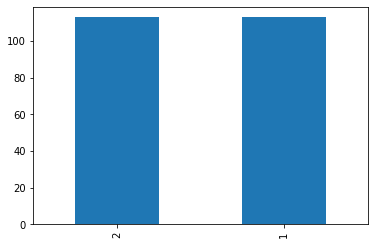

In [38]:
y_train.value_counts().plot(kind='bar')

## 4. Perform Decision Tree classification with entropy gain with a depth of 3 & 4. Plot the decision trees for all the models

## For depth=3

In [39]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(x_train,y_train)


In [40]:
print("predicted op")
prediction=obtained_tree.predict(x_train)
print(prediction)
print("actual op")
print(y_train.tolist())

predicted op
[1 2 2 1 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 2 1 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1
 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 2 1 1 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 1 1
 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2
 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 2
 1 2 2 1]
actual op
[1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 

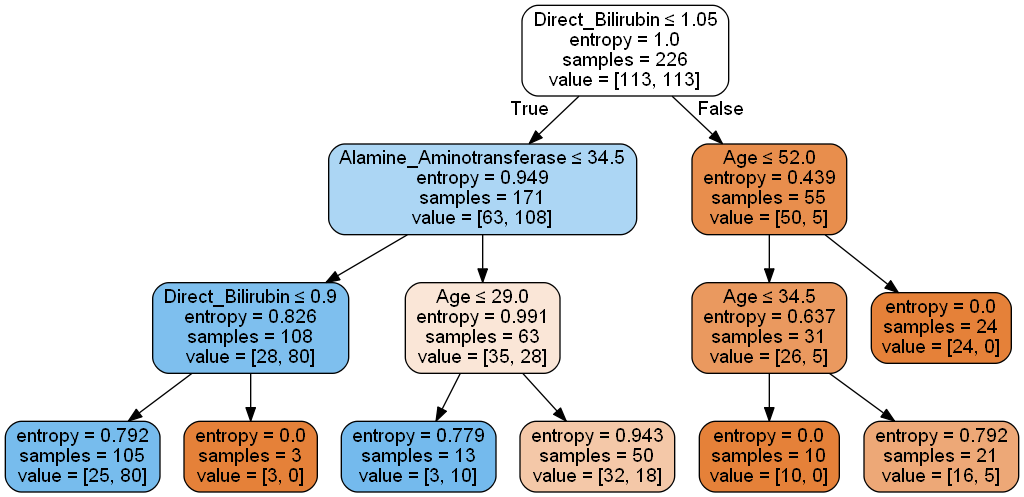

In [41]:
from io import StringIO
import os
os.environ['PATH'] += os.pathsep +' C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Age','Direct_Bilirubin','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

## For depth=4

In [42]:
decisiontree1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree1=decisiontree1.fit(x_train,y_train)


In [43]:
print("predicted op")
prediction1=obtained_tree1.predict(x_train)
print(prediction1)
print("actual op")
print(y_train.tolist())

predicted op
[1 2 2 1 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 2 1 1 1 2 1 2 1 2 1
 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1
 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 2 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 1 2 2 2 1 1
 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1
 2 2 1 2 1 1 2 1 2 2 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 2
 1 1 1 1]
actual op
[1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 

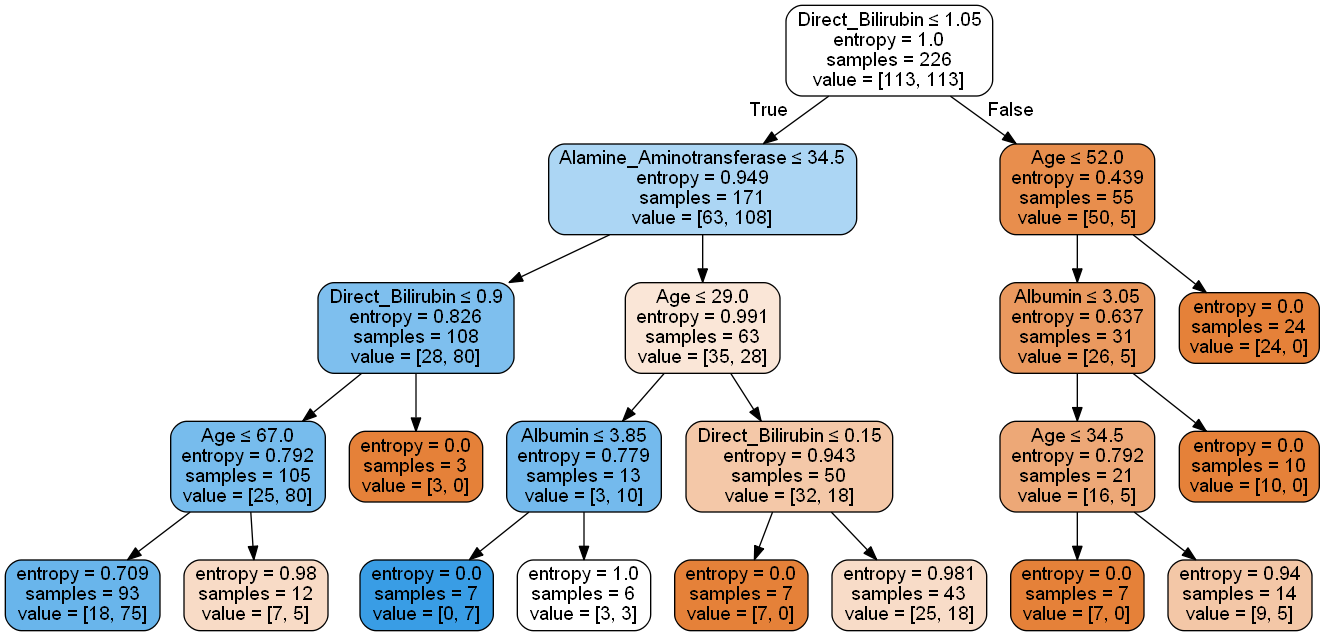

In [44]:
from io import StringIO
import os
os.environ['PATH'] += os.pathsep +' C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg=StringIO()
export_graphviz(obtained_tree1,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Age','Direct_Bilirubin','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [45]:
print(confusion_matrix(y_train,prediction1))

[[95 18]
 [31 82]]


In [46]:
print(classification_report(y_train,prediction1))

              precision    recall  f1-score   support

           1       0.75      0.84      0.79       113
           2       0.82      0.73      0.77       113

    accuracy                           0.78       226
   macro avg       0.79      0.78      0.78       226
weighted avg       0.79      0.78      0.78       226



## 5. Compare your output with the following metrics:

### for degree=3

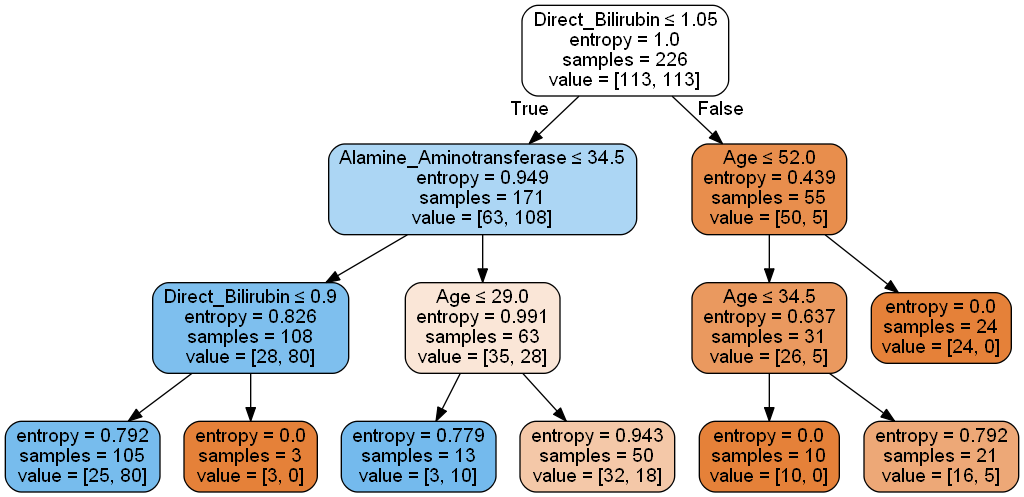

In [47]:
from io import StringIO
import os
os.environ['PATH'] += os.pathsep +' C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Age','Direct_Bilirubin','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [48]:
print(classification_report(y_train,prediction))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77       113
           2       0.76      0.80      0.78       113

    accuracy                           0.77       226
   macro avg       0.77      0.77      0.77       226
weighted avg       0.77      0.77      0.77       226



In [49]:
print(confusion_matrix(y_train,prediction))

[[85 28]
 [23 90]]


### for degree =4

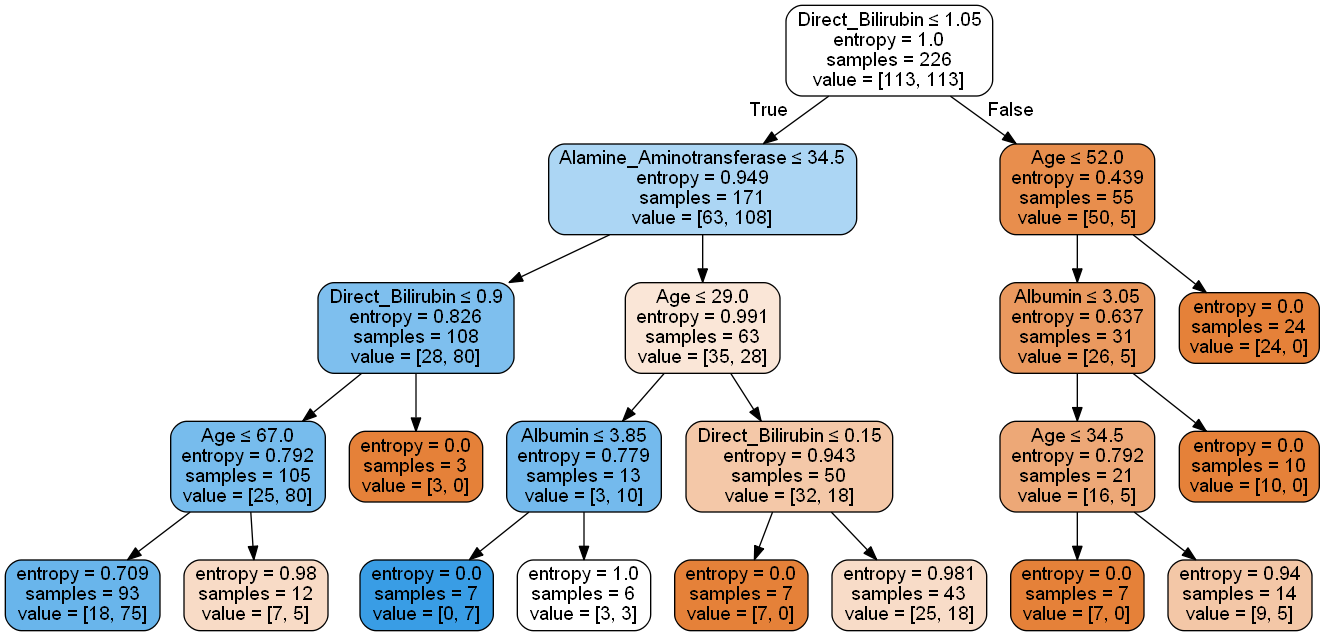

In [50]:
from io import StringIO
import os
os.environ['PATH'] += os.pathsep +' C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg=StringIO()
export_graphviz(obtained_tree1,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Age','Direct_Bilirubin','Alamine_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio'],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [51]:
print(confusion_matrix(y_train,prediction1))

[[95 18]
 [31 82]]


In [52]:
print(classification_report(y_train,prediction1))

              precision    recall  f1-score   support

           1       0.75      0.84      0.79       113
           2       0.82      0.73      0.77       113

    accuracy                           0.78       226
   macro avg       0.79      0.78      0.78       226
weighted avg       0.79      0.78      0.78       226



### Comparing both models degree=3 has accuracy of 77 % and predicted errors were 51
### whereas in degree=4 it has accuracy of 78 % and predicted errors were 49